In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed, disk
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
import cv2

from PIL import Image

size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()




  


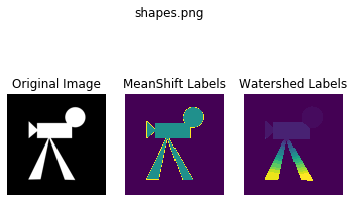

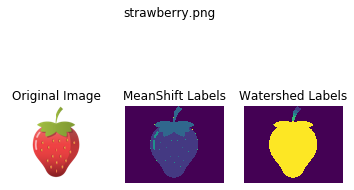

In [12]:

for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]
    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.
    

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    r = img_mat[:,:,0]
    g = img_mat[:,:,1]
    b = img_mat[:,:,2]
    
    width ,height = img.size

    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    r_ravel = r.ravel()
    g_ravel = g.ravel()
    b_ravel = b.ravel()
    
    cs = np.array([r_ravel,g_ravel,b_ravel])
    cs = cs.T

    # Step 3 - Perform Meanshift  clustering
    #
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(cs)

    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    ms_labels = np.reshape(ms_labels,(height,width))

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray =img.convert("L")
    img_gray.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_array = np.array(img_gray)
    
    


    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)

    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_maxi = peak_local_max(distance, indices=False)
    markers = ndi.label(local_maxi)[0]

    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=img_array)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",ws_labels, "Watershed Labels")




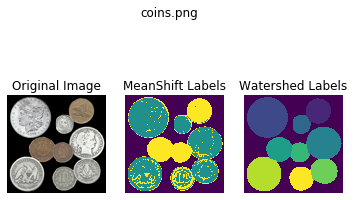

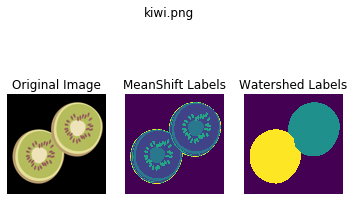

In [14]:

for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]
    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.
    

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    r = img_mat[:,:,0]
    g = img_mat[:,:,1]
    b = img_mat[:,:,2]
    
    width ,height = img.size

    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    r_ravel = r.ravel()
    g_ravel = g.ravel()
    b_ravel = b.ravel()
    
    cs = np.array([r_ravel,g_ravel,b_ravel])
    cs = cs.T

    # Step 3 - Perform Meanshift  clustering
    #
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(cs)

    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    ms_labels = np.reshape(ms_labels,(height,width))

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray = img.convert("L")
    img_gray = np.array(img_gray)

    thresh = cv2.threshold(img_gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    distance = ndi.distance_transform_edt(img_gray) 
    local_maxi = peak_local_max(distance, min_distance=10, indices=False,labels=thresh)
    markers = ndi.label(local_maxi,structure=np.ones((3, 3)))[0]
    ws_labels = watershed(-distance, markers, mask=thresh) 
    
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
